# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city.
    city_url = f"{url}q={city}&units={units}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()

        # Check if the city is found in the response.
        if city_weather["cod"] == "404":
            print("City not found. Skipping...")
            continue

        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into city_data list.
        city_data.append({
            "City": city.title(),
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city.
    except Exception as e:
        print(f"Error processing city {city}: {str(e)}. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | viedma
Processing Record 2 of Set 1 | kingston
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | kalmunai
Processing Record 5 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | illizi
Processing Record 8 of Set 1 | udachny
Processing Record 9 of Set 1 | laguna
Processing Record 10 of Set 1 | san patricio
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | itamaraca
Processing Record 15 of Set 1 | tual
Processing Record 16 of Set 1 | sao vicente
Processing Record 17 of Set 1 | badger
Processing Record 18 of Set 1 | la ronge
Processing Record 19 of Set 1 | brookings
Processing Record 20 of Set 1 | tsiolkovskiy
City not found. Skipping...
Processing Record 21 of Set 1 | kodiak
Processing Record 22

Processing Record 38 of Set 4 | yuzhno-kurilsk
Processing Record 39 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 40 of Set 4 | stanley
Processing Record 41 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 42 of Set 4 | utrik
Processing Record 43 of Set 4 | maquoketa
Processing Record 44 of Set 4 | egilsstadir
Processing Record 45 of Set 4 | trapani
Processing Record 46 of Set 4 | kushiro
Processing Record 47 of Set 4 | new cairo
City not found. Skipping...
Processing Record 48 of Set 4 | hermiston
Processing Record 49 of Set 4 | mindelo
Processing Record 0 of Set 5 | rongelap
Processing Record 1 of Set 5 | price
Processing Record 2 of Set 5 | xilin hot
Processing Record 3 of Set 5 | tolanaro
Processing Record 4 of Set 5 | griffith
Processing Record 5 of Set 5 | gualeguay
Processing Record 6 of Set 5 | moussoro
Processing Record 7 of Set 5 | merizo village
Processing Record 8 of Set 5 | fortuna
Processing Record 9 of Set 5 | fale old settlement
Proc

Processing Record 31 of Set 8 | mumford
Processing Record 32 of Set 8 | queenstown
Processing Record 33 of Set 8 | alfredo v. bonfil
Processing Record 34 of Set 8 | airuk
Processing Record 35 of Set 8 | dampit
Processing Record 36 of Set 8 | northumberland
Processing Record 37 of Set 8 | antofagasta
Processing Record 38 of Set 8 | cherdyn'
Processing Record 39 of Set 8 | la passe
Processing Record 40 of Set 8 | ambodifotatra
Processing Record 41 of Set 8 | fairmont
Processing Record 42 of Set 8 | ulsteinvik
Processing Record 43 of Set 8 | tazovsky
Processing Record 44 of Set 8 | kayenta
Processing Record 45 of Set 8 | kachia
Processing Record 46 of Set 8 | gueoul
City not found. Skipping...
Processing Record 47 of Set 8 | hadibu
Processing Record 48 of Set 8 | chernyshevskiy
Processing Record 49 of Set 8 | major isidoro
Processing Record 0 of Set 9 | mana
Processing Record 1 of Set 9 | saipan
Processing Record 2 of Set 9 | posse
Processing Record 3 of Set 9 | ko lanta
Processing Record

Processing Record 24 of Set 12 | samdrup jongkhar
Processing Record 25 of Set 12 | at taj
Processing Record 26 of Set 12 | vyazemskiy
Processing Record 27 of Set 12 | marbella
Processing Record 28 of Set 12 | belokurikha
Processing Record 29 of Set 12 | gebre guracha
Processing Record 30 of Set 12 | san antonio del estrecho
City not found. Skipping...
Processing Record 31 of Set 12 | ginir
Processing Record 32 of Set 12 | songjiang
Processing Record 33 of Set 12 | kampene
Processing Record 34 of Set 12 | howard springs
Processing Record 35 of Set 12 | vatra dornei
Processing Record 36 of Set 12 | san jose village
City not found. Skipping...
Processing Record 37 of Set 12 | shuangcheng
Processing Record 38 of Set 12 | barcelos
Processing Record 39 of Set 12 | labuan
Processing Record 40 of Set 12 | baymak
Processing Record 41 of Set 12 | rusape
Processing Record 42 of Set 12 | south hedland
Processing Record 43 of Set 12 | barguzin
Processing Record 44 of Set 12 | mandan
Processing Reco

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Viedma,-40.8135,-62.9967,68.50,50,100,20.33,AR,2023-12-11 02:51:12
1,Kingston,17.9970,-76.7936,83.35,76,40,20.71,JM,2023-12-11 02:47:10
2,Port-Aux-Francais,-49.3500,70.2167,39.78,77,78,20.98,TF,2023-12-11 02:49:29
3,Kalmunai,7.4167,81.8167,80.20,82,92,5.21,LK,2023-12-11 02:51:12
4,Grytviken,-54.2811,-36.5092,41.88,95,100,14.36,GS,2023-12-11 02:49:31


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Viedma,-40.8135,-62.9967,68.50,50,100,20.33,AR,2023-12-11 02:51:12
1,Kingston,17.9970,-76.7936,83.35,76,40,20.71,JM,2023-12-11 02:47:10
2,Port-Aux-Francais,-49.3500,70.2167,39.78,77,78,20.98,TF,2023-12-11 02:49:29
3,Kalmunai,7.4167,81.8167,80.20,82,92,5.21,LK,2023-12-11 02:51:12
4,Grytviken,-54.2811,-36.5092,41.88,95,100,14.36,GS,2023-12-11 02:49:31


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

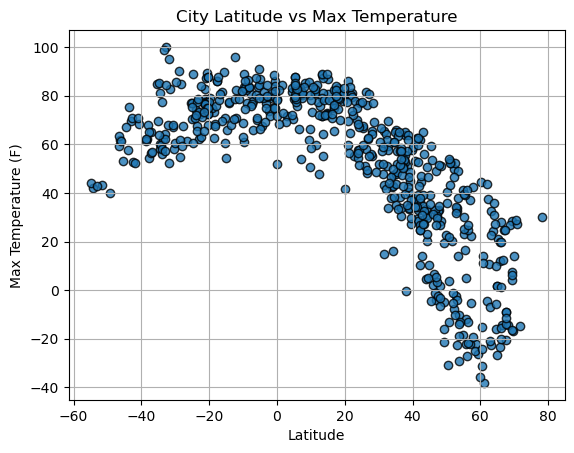

In [16]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

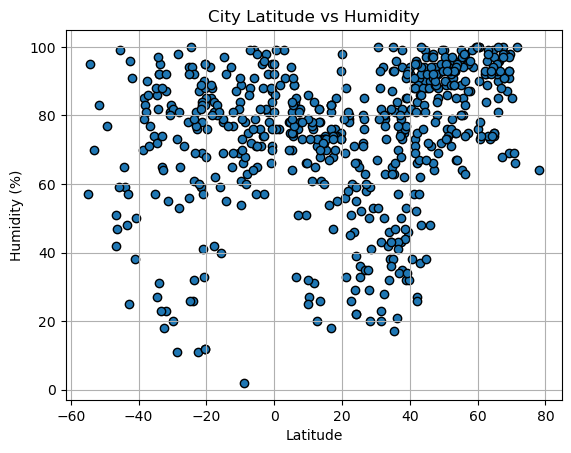

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)", color="black")
plt.xlabel("Latitude", color="black")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

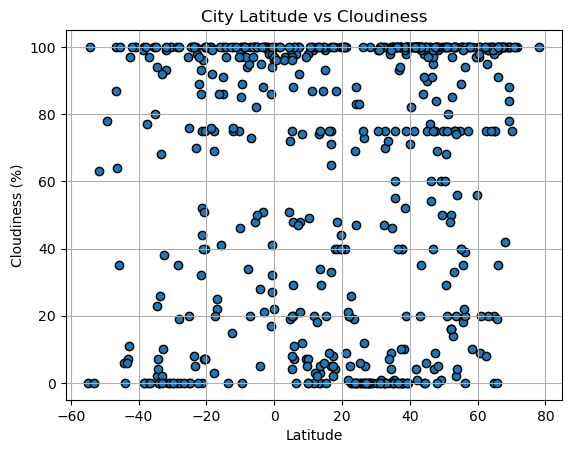

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)", color="black")
plt.xlabel("Latitude", color="black")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

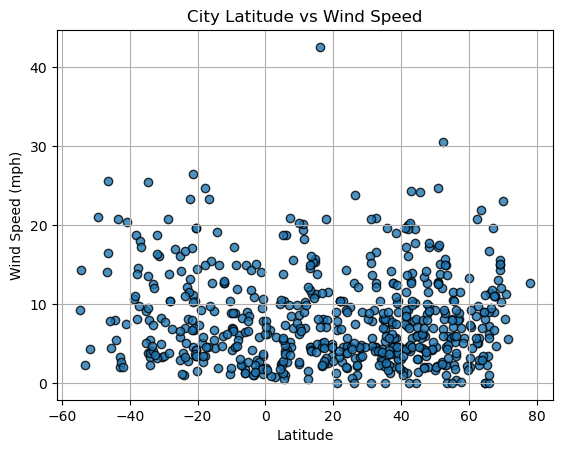

In [19]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, alpha = 0.80, edgecolors = "k", linewidths = 1)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
# Define a function to create Linear Regression plots
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, title):
    # Calculate linear regression values
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Create regression line
    regression_line = slope * x_values + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values, label="Data Points")
    
    # Plot regression line
    plt.plot(x_values, regression_line, color="red", label=f'Linear Regression\nR-squared: {r_value**2:.2f}')
    
    # Label axes and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Show legend
    plt.legend()
    
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.annotate(line_eq, xy=(.10, .70), fontsize=20, color="red", xycoords="axes fraction")

    # Show the plot
    plt.show()

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Kingston,17.9970,-76.7936,83.35,76,40,20.71,JM,2023-12-11 02:47:10
3,Kalmunai,7.4167,81.8167,80.20,82,92,5.21,LK,2023-12-11 02:51:12
5,Illizi,26.4833,8.4667,48.00,76,12,3.11,DZ,2023-12-11 02:51:13
6,Udachny,66.4167,112.4000,-14.28,96,100,11.45,RU,2023-12-11 02:49:39
7,Laguna,38.4210,-121.4238,50.94,75,0,5.75,US,2023-12-11 02:49:55


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Viedma,-40.8135,-62.9967,68.50,50,100,20.33,AR,2023-12-11 02:51:12
2,Port-Aux-Francais,-49.3500,70.2167,39.78,77,78,20.98,TF,2023-12-11 02:49:29
4,Grytviken,-54.2811,-36.5092,41.88,95,100,14.36,GS,2023-12-11 02:49:31
9,Adamstown,-25.0660,-130.1015,70.36,56,0,5.77,PN,2023-12-11 02:49:34
10,Puerto Ayora,-0.7393,-90.3518,75.22,87,32,7.85,EC,2023-12-11 02:49:42


###  Temperature vs. Latitude Linear Regression Plot

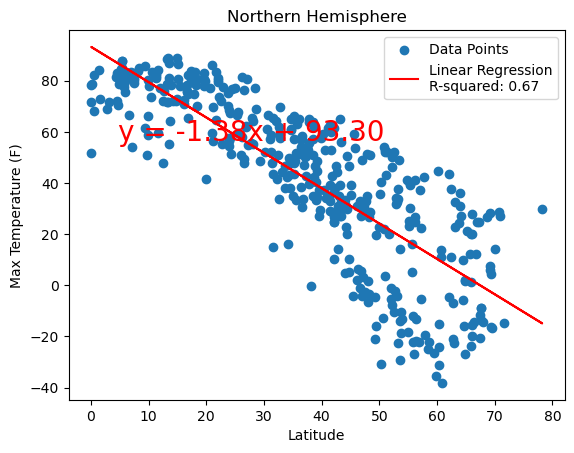

In [23]:
# Linear regression on Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Max Temp"]
regression_line_northern = createLinearRegressionPlot(x_values_northern, y_values_northern, "Latitude", "Max Temperature (F)", "Northern Hemisphere")


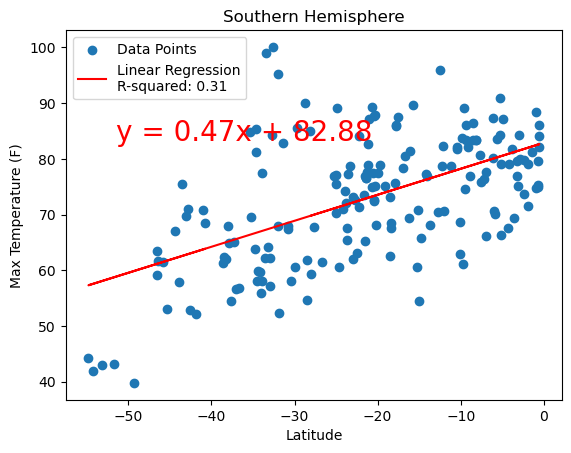

In [24]:
# Linear regression on Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Max Temp"]
regression_line_southern = createLinearRegressionPlot(x_values_southern, y_values_southern, "Latitude", "Max Temperature (F)", "Southern Hemisphere")

**Discussion about the linear relationship:** 

The Northern Hemisphere plot shows a linear regression model portraying the relationship between maximum temperature and latitude for cities in the Northern Hemisphere. Analysis of the data reveals a steep negative correlation between maximum temperature and latitude. This implies that as one moves farther away from the equator, the maximum temperature (F) tends to decrease significantly.

The Southern Hemisphere plot shows a linear regression model examining the association between maximum temperature and latitude for cities in the Southern Hemisphere. The data analysis indicates a positive correlation between maximum temperature and latitude in Southern Hemisphere cities. This implies that as one moves closer to the equator, the maximum temperature (F) tends to increase.

### Humidity vs. Latitude Linear Regression Plot

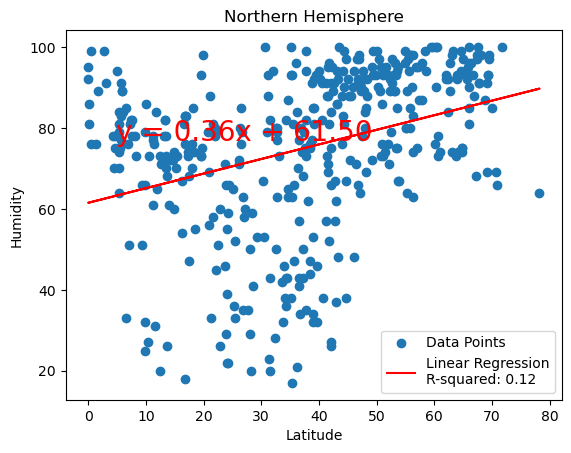

In [31]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Humidity"]
regression_line_northern = createLinearRegressionPlot(x_values_northern, y_values_northern, "Latitude", "Humidity", "Northern Hemisphere")

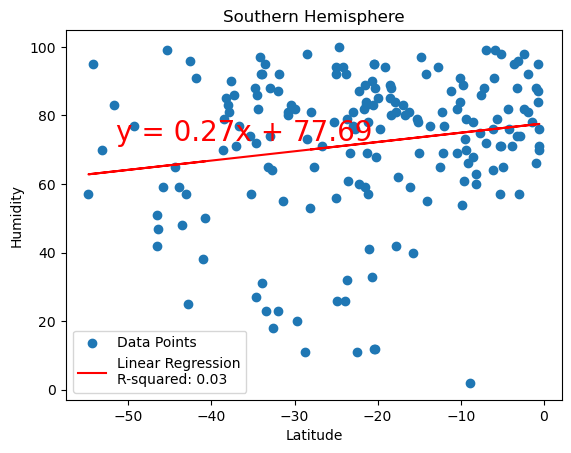

In [32]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Humidity"]
regression_line_southern = createLinearRegressionPlot(x_values_southern, y_values_southern, "Latitude", "Humidity", "Southern Hemisphere")

**Discussion about the linear relationship:** 

The Northern Hemisphere plot shows a linear regression model portraying the relationship between Humidity and latitude for cities in the Northern Hemisphere. Analysis of the data reveals a positive correlation between Humidity and latitude. This implies that as one moves farther away from the equator, the humidity levels tend to increase.

The Southern Hemisphere plot shows a linear regression model portraying the relationship between Humidity and latitude for cities in the Southern Hemisphere. Analysis of the data reveals a very slight positive correlation between Humidity and latitude. This implies that as one moves closer towards the equator, the humidity levels tend to only increase very slightly.


### Cloudiness vs. Latitude Linear Regression Plot

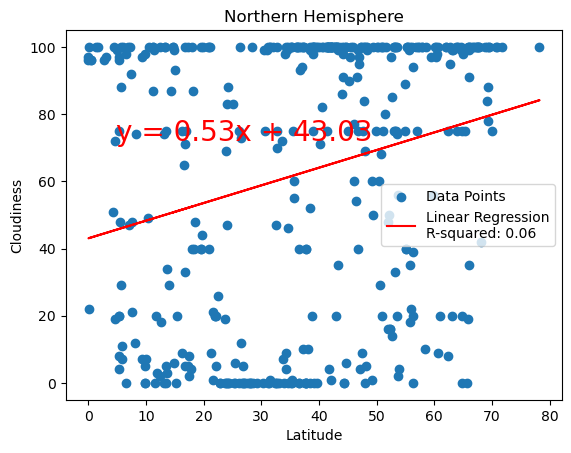

In [33]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Cloudiness"]
regression_line_northern = createLinearRegressionPlot(x_values_northern, y_values_northern, "Latitude", "Cloudiness", "Northern Hemisphere")

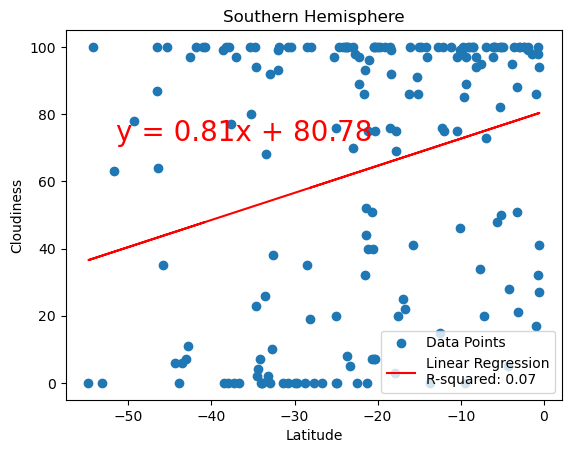

In [34]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Cloudiness"]
regression_line_southern = createLinearRegressionPlot(x_values_southern, y_values_southern, "Latitude", "Cloudiness", "Southern Hemisphere")

**Discussion about the linear relationship:** 

The Northern Hemisphere plot shows a linear regression model portraying the relationship between cloudiness and latitude for cities in the Northern Hemisphere. Analysis of the data reveals a slight positive correlation between cloudiness and latitude. This implies that as one moves farther away from the equator, the cloudiness levels tend to increase slightly.

The Southern Hemisphere plot shows a linear regression model portraying the relationship between cloudiness and latitude for cities in the Southern Hemisphere. Analysis of the data reveals a positive correlation between cloudiness and latitude. This implies that as one moves closer towards the equator, the cloudiness levels tend to only increase.

### Wind Speed vs. Latitude Linear Regression Plot

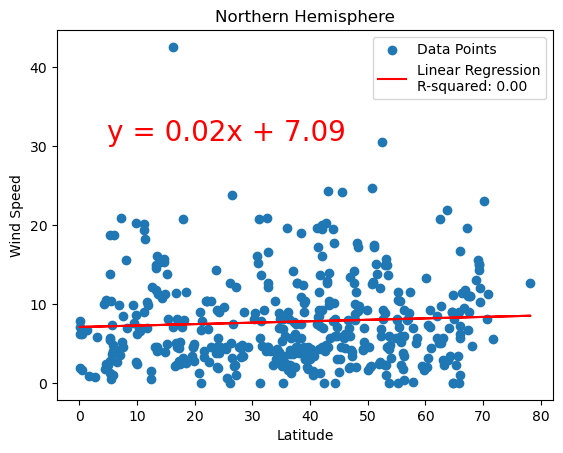

In [35]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Wind Speed"]
regression_line_northern = createLinearRegressionPlot(x_values_northern, y_values_northern, "Latitude", "Wind Speed", "Northern Hemisphere")

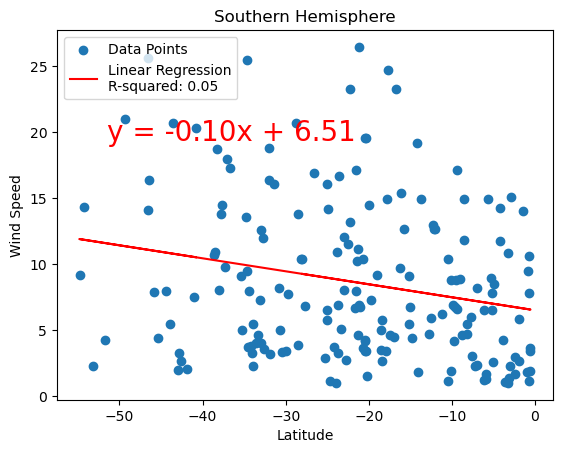

In [36]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Wind Speed"]
regression_line_southern = createLinearRegressionPlot(x_values_southern, y_values_southern, "Latitude", "Wind Speed", "Southern Hemisphere")

**Discussion about the linear relationship:** 

The Northern Hemisphere plot shows a linear regression model portraying the relationship between wind speed and latitude for cities in the Northern Hemisphere. Analysis of the data reveals a very slight positive correlation between wind speed and latitude. This implies that as one moves farther away from the equator, the wind speed tends to increase only very slightly.

The Southern Hemisphere plot shows a linear regression model portraying the relationship between wind speed and latitude for cities in the Southern Hemisphere. Analysis of the data reveals a negative correlation between wind speed and latitude. This implies that as one moves closer towards the equator, the wind speed tends to decrease slightly.